# Self-Attention

Self-attention is a technique in AI that helps a system focus on different parts of a sentence or data at the same time, understanding how each part relates to the others.

Here’s a simplified and intuitive example of self-attention where we manually compute and visualize how a word focuses on others in a sentence. This example avoids complex matrix multiplications and demonstrates the process step-by-step.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Self-attention mechanism
def self_attention(embeddings):
    """
    Compute scaled dot-product self-attention.
    """
    # Step 1: Query, Key, Value matrices (using embeddings for simplicity)
    query = key = value = embeddings

    # Step 2: Compute attention scores (scaled dot product)
    scores = np.dot(query, key.T) / np.sqrt(embedding_dim)

    # Step 3: Apply softmax to get attention weights
    attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)

    # Step 4: Compute the weighted sum of values
    attended_output = np.dot(attention_weights, value)

    return attention_weights, attended_output

def display_results(sentence, inputs, attention_weights, outputs):
    """
    Display embeddings, attention weights, and outputs as tables and heatmap.
    """
    print("Input Embeddings:")
    with pd.option_context('expand_frame_repr', False):
        print(pd.DataFrame(inputs, index=sentence, columns=[f"Dim{i+1}" for i in range(inputs.shape[1])]))

    attention_df = pd.DataFrame(attention_weights, index=sentence, columns=sentence)
    print("\nAttention Weights:")
    with pd.option_context('expand_frame_repr', False):
        print(attention_df)

    print("\nSelf-Attention Outputs:")
    with pd.option_context('expand_frame_repr', False):
        print(pd.DataFrame(outputs, index=sentence, columns=[f"Dim{i+1}" for i in range(outputs.shape[1])]))

    # Visualize attention weights as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(attention_df, annot=True, cmap="Reds", fmt=".2f", cbar=True)
    plt.title("Self-Attention Heatmap")
    plt.xlabel("Focus On")
    plt.ylabel("Word")
    plt.show()

Input Embeddings:
              Dim1      Dim2      Dim3
i         0.245287  0.804251  0.174484
love      0.969521  0.225485  0.869218
learning  0.281466  0.725420  0.752380
about     0.246671  0.771765  0.085679
ai.       0.891408  0.218040  0.934470

Attention Weights:
                 i      love  learning     about       ai.
i         0.207773  0.188719  0.213403  0.202880  0.187225
love      0.138463  0.272951  0.186905  0.131971  0.269710
learning  0.178482  0.213058  0.223270  0.169446  0.215745
about     0.210819  0.186909  0.210527  0.206919  0.184825
ai.       0.138064  0.271078  0.190223  0.131161  0.269474

Self-Attention Outputs:
              Dim1      Dim2      Dim3
i         0.510935  0.561860  0.553190
love      0.624178  0.469148  0.665381
learning  0.547300  0.531363  0.600445
about     0.507976  0.564410  0.548088
ai.       0.622788  0.470135  0.665889


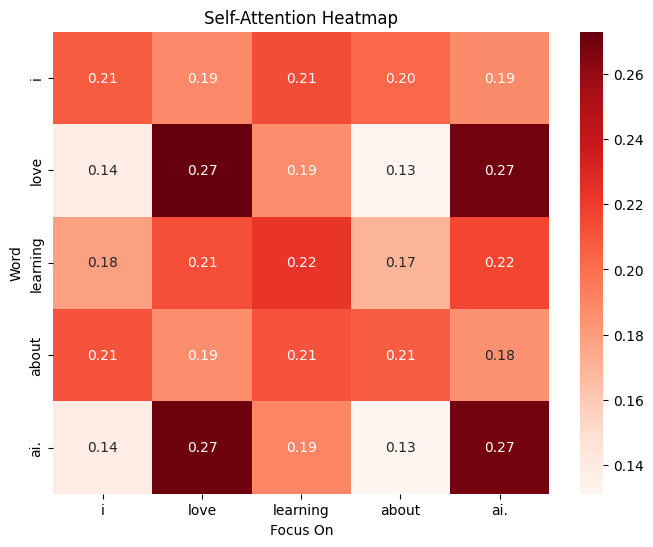

In [2]:
# Input sentence
sentence = "I love learning about AI."

# Tokenize the sentence (simplified for demonstration)
tokens = sentence.lower().split()

# Create dummy embeddings for each token (random vectors)
np.random.seed(1212)  # For reproducibility
embedding_dim = 3
embeddings = np.random.rand(len(tokens), embedding_dim)

# Compute attention weights and attended outputs
attention_weights, attended_output = self_attention(embeddings)

# Display results
display_results(tokens, embeddings, attention_weights, attended_output)


The given attention weights for the sentence "I love learning about AI." can be interpreted to reveal how the model assigns importance to relationships between tokens. Here's a detailed interpretation:

### Key Components
1. **Rows (Queries)**: These represent the **query tokens**—the tokens actively focusing on others.
2. **Columns (Keys)**: These represent the **key tokens**—the tokens being attended to by the queries.
3. **Values**: Indicate the attention weight. Higher values suggest greater importance in the query's focus.

### Token-by-Token Analysis
1. **"I" (Row 1)**:
   - **Self-attention**: 0.208, indicating a moderate focus on itself to preserve its role as the subject.
   - **"learning" (0.213)** and **"about" (0.203)**: These receive higher attention as they provide context for the subject's action.
   - **"love" (0.189)** and **"AI" (0.187)**: Lesser focus on these, as they are slightly further from the subject semantically.

2. **"love" (Row 2)**:
   - **Self-attention**: 0.273, the highest in this row, showing that "love" emphasizes its own importance as the main verb.
   - **"AI" (0.270)**: Shares significant attention with "love," indicating the model’s recognition that "AI" is the ultimate object of affection in the sentence.
   - **"learning" (0.187)**: Moderate attention, connecting the verb to the associated action.
   - Lower attention is given to **"about" (0.132)** and **"I" (0.138)**, as they are peripheral to the main relationship between "love" and "AI."

3. **"learning" (Row 3)**:
   - **Self-attention**: 0.223, highlighting "learning" as central to its context.
   - Balanced attention to **"love" (0.213)** and **"AI" (0.216)**, reflecting their close relationship to the act of learning.
   - Moderate attention to **"about" (0.169)**, as it provides grammatical structure.

4. **"about" (Row 4)**:
   - **Self-attention**: 0.207, showing that "about" is integral to defining the relationship between "learning" and "AI."
   - Balanced attention across **"I" (0.211)**, **"learning" (0.211)**, and **"AI" (0.185)**, indicating its role as a connector.

5. **"AI" (Row 5)**:
   - **Self-attention**: 0.269, indicating that "AI" retains its role as the ultimate focus of the sentence.
   - Strong connection to **"love" (0.271)**, reflecting the relationship between the subject’s affection and the object of focus.
   - Moderate connection to **"learning" (0.190)**, as "AI" is the object being learned about.

### Observations and Relationships
1. **Diagonal Dominance**:
   - Each token places a strong focus on itself (highest values on the diagonal), reflecting self-attention's role in maintaining token-specific information.

2. **Strong Relationships**:
   - **"love" ↔ "AI"**: These tokens have mutually high attention weights (0.270–0.271), emphasizing their semantic link.
   - **"learning" ↔ "AI"**: The weights (0.216 and 0.190) reflect their relationship in the sentence as the act ("learning") relates to the topic ("AI").

3. **Contextual Tokens**:
   - **"about"**: Has balanced attention weights, reflecting its function as a preposition connecting "learning" and "AI."

### Insights on Self-Reflection in LLM
The attention matrix demonstrates how the model:
- Focuses on key relationships (e.g., subject-verb-object: "I love AI").
- Balances local and global context (e.g., linking "learning" to both "love" and "AI").
- Dynamically adjusts focus based on token roles (e.g., "about" distributing its attention to connect surrounding tokens).

Use the heatmap visualization to better illustrate these insights.